# ANALISIS DE CONSUMO DE NETFLIX CON PYTHON

## 1. IMPORTACION Y CARGA DE DATOS

In [1]:
from google.colab import files
datos = files.upload()

Saving NetflixViewingHistory.csv to NetflixViewingHistory.csv


In [2]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(datos['NetflixViewingHistory.csv']))

## 2. ANALISIS EXPLORATORIO

In [3]:
df.shape

(94, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   94 non-null     object
 1   Date    94 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [5]:
df.head(50)

,Title,Date
0,The Witcher: La pesadilla del lobo,25/8/21
1,Breaking Bad: Temporada 2: Rotura,9/8/21
2,Breaking Bad: Temporada 2: Abajo,9/8/21
3,Fullmetal Alchemist: Brotherhood: Parte 1: El ...,8/8/21
4,Mad Max: Furia en el camino,5/8/21
5,Castlevania: Temporada 4: Ha sido un viaje ext...,29/7/21
6,Castlevania: Temporada 4: El final,29/7/21
7,Castlevania: Temporada 4: Magia de muerte,29/7/21
8,Castlevania: Temporada 4: La gran obra,27/7/21
9,Castlevania: Temporada 4: No merecen mi sangre,26/7/21


Vemos que parece que existe un patrón en el que diferentes partes se se separan mediante dos puntos. Vamos a contar en cuantas partes distintas se seperan nuestros contenidos

In [6]:
separacion_lista = df.Title.str.split(pat = ':', expand=False).to_frame()
separacion_lista

,Title
0,"[The Witcher, La pesadilla del lobo]"
1,"[Breaking Bad, Temporada 2, Rotura]"
2,"[Breaking Bad, Temporada 2, Abajo]"
3,"[Fullmetal Alchemist, Brotherhood, Parte 1, ..."
4,"[Mad Max, Furia en el camino]"
...,...
89,"[DEATH NOTE, Death Note, Decision]"
90,"[DEATH NOTE, Death Note, Wager]"
91,"[DEATH NOTE, Death Note, Friend]"
92,"[DEATH NOTE, Death Note, Confession]"


In [7]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,"[The Witcher, La pesadilla del lobo]",2
1,"[Breaking Bad, Temporada 2, Rotura]",3
2,"[Breaking Bad, Temporada 2, Abajo]",3
3,"[Fullmetal Alchemist, Brotherhood, Parte 1, ...",4
4,"[Mad Max, Furia en el camino]",2
...,...,...
89,"[DEATH NOTE, Death Note, Decision]",3
90,"[DEATH NOTE, Death Note, Wager]",3
91,"[DEATH NOTE, Death Note, Friend]",3
92,"[DEATH NOTE, Death Note, Confession]",3


In [8]:
separacion_lista.num_partes.value_counts()

3    68
4    12
1    10
2     4
Name: num_partes, dtype: int64

Vamos a analizar los títulos por número de partes a ver si hay algún patrón.

In [9]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(10)

,Title,num_partes
40,[El juicio de los 7 de Chicago],1
43,[Madame Curie],1
47,[Ghost in the Shell],1
56,[El viaje de Chihiro],1
71,[Dunkerque],1
76,[Un abrazo de tres minutos],1
82,[Los dos papas],1
83,[Los siete pecados capitales],1
84,[Gánster americano],1
93,[Nada es privado],1


In [10]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(10)

,Title,num_partes
0,"[The Witcher, La pesadilla del lobo]",2
4,"[Mad Max, Furia en el camino]",2
42,"[Héroes, Silencio y rock & roll]",2
77,"[Winter on Fire, Ukraine's Fight for Freedom]",2


In [11]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

,Title,num_partes
1,"[Breaking Bad, Temporada 2, Rotura]",3
2,"[Breaking Bad, Temporada 2, Abajo]",3
5,"[Castlevania, Temporada 4, Ha sido un viaje ...",3
6,"[Castlevania, Temporada 4, El final]",3
7,"[Castlevania, Temporada 4, Magia de muerte]",3
8,"[Castlevania, Temporada 4, La gran obra]",3
9,"[Castlevania, Temporada 4, No merecen mi san...",3
10,"[Castlevania, Temporada 4, Volver a la vida]",3
11,"[Castlevania, Temporada 4, Sacrificar todo]",3
12,"[Castlevania, Temporada 4, Sigue caminando]",3


In [12]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(10)

,Title,num_partes
3,"[Fullmetal Alchemist, Brotherhood, Parte 1, ...",4
15,"[Amos del Universo, Revelación, Parte 1, El...",4
16,"[Amos del Universo, Revelación, Parte 1, El...",4
44,"[13 de noviembre, Terror en París, Miniserie...",4
46,"[13 de noviembre, Terror en París, Miniserie...",4
48,"[Ghost in the Shell, SAC_2045, Temporada 1, ...",4
49,"[Ghost in the Shell, SAC_2045, Temporada 1, ...",4
50,"[Ghost in the Shell, SAC_2045, Temporada 1, ...",4
51,"[Ghost in the Shell, SAC_2045, Temporada 1, ...",4
54,"[After Life, Más allá de mi mujer, Temporada...",4


## 3. CREACIÓN DE VARIABLES

Nuestro dataset original tiene muy pocas variables, pero con un poco de trabajo podemos generar nuevas variables. Este proceso se llama "feature extraction".

### 3.1 VARIABLES DERIVADAS DEL TÍTULO

In [14]:
import numpy as np

separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,"[The Witcher, La pesadilla del lobo]",2,pelicula
1,"[Breaking Bad, Temporada 2, Rotura]",3,serie
2,"[Breaking Bad, Temporada 2, Abajo]",3,serie
3,"[Fullmetal Alchemist, Brotherhood, Parte 1, ...",4,serie
4,"[Mad Max, Furia en el camino]",2,pelicula
...,...,...,...
89,"[DEATH NOTE, Death Note, Decision]",3,serie
90,"[DEATH NOTE, Death Note, Wager]",3,serie
91,"[DEATH NOTE, Death Note, Friend]",3,serie
92,"[DEATH NOTE, Death Note, Confession]",3,serie


In [15]:
df = pd.concat([df,separacion_lista['tipo']], axis = 1)
df

,Title,Date,tipo
0,The Witcher: La pesadilla del lobo,25/8/21,pelicula
1,Breaking Bad: Temporada 2: Rotura,9/8/21,serie
2,Breaking Bad: Temporada 2: Abajo,9/8/21,serie
3,Fullmetal Alchemist: Brotherhood: Parte 1: El ...,8/8/21,serie
4,Mad Max: Furia en el camino,5/8/21,pelicula
...,...,...,...
89,DEATH NOTE: Death Note: Decision,5/12/20,serie
90,DEATH NOTE: Death Note: Wager,5/12/20,serie
91,DEATH NOTE: Death Note: Friend,5/12/20,serie
92,DEATH NOTE: Death Note: Confession,5/12/20,serie


Vamos a dividir los títulos en sus diferentes niveles y generar así nuevas variables

In [16]:
separacion_cols = df.Title.str.split(pat = ':', expand=True)
separacion_cols

,0,1,2,3
0,The Witcher,La pesadilla del lobo,None,None
1,Breaking Bad,Temporada 2,Rotura,None
2,Breaking Bad,Temporada 2,Abajo,None
3,Fullmetal Alchemist,Brotherhood,Parte 1,El alquimista de acero
4,Mad Max,Furia en el camino,None,None
...,...,...,...,...
89,DEATH NOTE,Death Note,Decision,None
90,DEATH NOTE,Death Note,Wager,None
91,DEATH NOTE,Death Note,Friend,None
92,DEATH NOTE,Death Note,Confession,None


In [18]:
separacion_cols.columns = ['nivel1','nivel2','nivel3','nivel4']
separacion_cols

,nivel1,nivel2,nivel3,nivel4
0,The Witcher,La pesadilla del lobo,None,None
1,Breaking Bad,Temporada 2,Rotura,None
2,Breaking Bad,Temporada 2,Abajo,None
3,Fullmetal Alchemist,Brotherhood,Parte 1,El alquimista de acero
4,Mad Max,Furia en el camino,None,None
...,...,...,...,...
89,DEATH NOTE,Death Note,Decision,None
90,DEATH NOTE,Death Note,Wager,None
91,DEATH NOTE,Death Note,Friend,None
92,DEATH NOTE,Death Note,Confession,None


In [19]:
df = pd.concat([df,separacion_cols], axis = 1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4
0,The Witcher: La pesadilla del lobo,25/8/21,pelicula,The Witcher,La pesadilla del lobo,None,None
1,Breaking Bad: Temporada 2: Rotura,9/8/21,serie,Breaking Bad,Temporada 2,Rotura,None
2,Breaking Bad: Temporada 2: Abajo,9/8/21,serie,Breaking Bad,Temporada 2,Abajo,None
3,Fullmetal Alchemist: Brotherhood: Parte 1: El ...,8/8/21,serie,Fullmetal Alchemist,Brotherhood,Parte 1,El alquimista de acero
4,Mad Max: Furia en el camino,5/8/21,pelicula,Mad Max,Furia en el camino,None,None
...,...,...,...,...,...,...,...
89,DEATH NOTE: Death Note: Decision,5/12/20,serie,DEATH NOTE,Death Note,Decision,None
90,DEATH NOTE: Death Note: Wager,5/12/20,serie,DEATH NOTE,Death Note,Wager,None
91,DEATH NOTE: Death Note: Friend,5/12/20,serie,DEATH NOTE,Death Note,Friend,None
92,DEATH NOTE: Death Note: Confession,5/12/20,serie,DEATH NOTE,Death Note,Confession,None


### 3.2 VARIABLES DERIVADAS DE LA FECHA

Podemos extraer los diferentes compontentes de una fecha para generar nuevas variables.

In [20]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date',inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,fecha
0,The Witcher: La pesadilla del lobo,pelicula,The Witcher,La pesadilla del lobo,None,None,2021-08-25
1,Breaking Bad: Temporada 2: Rotura,serie,Breaking Bad,Temporada 2,Rotura,None,2021-09-08
2,Breaking Bad: Temporada 2: Abajo,serie,Breaking Bad,Temporada 2,Abajo,None,2021-09-08
3,Fullmetal Alchemist: Brotherhood: Parte 1: El ...,serie,Fullmetal Alchemist,Brotherhood,Parte 1,El alquimista de acero,2021-08-08
4,Mad Max: Furia en el camino,pelicula,Mad Max,Furia en el camino,None,None,2021-05-08
...,...,...,...,...,...,...,...
89,DEATH NOTE: Death Note: Decision,serie,DEATH NOTE,Death Note,Decision,None,2020-05-12
90,DEATH NOTE: Death Note: Wager,serie,DEATH NOTE,Death Note,Wager,None,2020-05-12
91,DEATH NOTE: Death Note: Friend,serie,DEATH NOTE,Death Note,Friend,None,2020-05-12
92,DEATH NOTE: Death Note: Confession,serie,DEATH NOTE,Death Note,Confession,None,2020-05-12


In [21]:
df.set_index('fecha', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4
fecha,,,,,,
2021-08-25,The Witcher: La pesadilla del lobo,pelicula,The Witcher,La pesadilla del lobo,None,None
2021-09-08,Breaking Bad: Temporada 2: Rotura,serie,Breaking Bad,Temporada 2,Rotura,None
2021-09-08,Breaking Bad: Temporada 2: Abajo,serie,Breaking Bad,Temporada 2,Abajo,None
2021-08-08,Fullmetal Alchemist: Brotherhood: Parte 1: El ...,serie,Fullmetal Alchemist,Brotherhood,Parte 1,El alquimista de acero
2021-05-08,Mad Max: Furia en el camino,pelicula,Mad Max,Furia en el camino,None,None
...,...,...,...,...,...,...
2020-05-12,DEATH NOTE: Death Note: Decision,serie,DEATH NOTE,Death Note,Decision,None
2020-05-12,DEATH NOTE: Death Note: Wager,serie,DEATH NOTE,Death Note,Wager,None
2020-05-12,DEATH NOTE: Death Note: Friend,serie,DEATH NOTE,Death Note,Friend,None


Creamos una función para extraer los componentes.

In [22]:
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [23]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,
2021-08-25,The Witcher: La pesadilla del lobo,pelicula,The Witcher,La pesadilla del lobo,None,None,2021,August,25,Wednesday
2021-09-08,Breaking Bad: Temporada 2: Rotura,serie,Breaking Bad,Temporada 2,Rotura,None,2021,September,8,Wednesday
2021-09-08,Breaking Bad: Temporada 2: Abajo,serie,Breaking Bad,Temporada 2,Abajo,None,2021,September,8,Wednesday
2021-08-08,Fullmetal Alchemist: Brotherhood: Parte 1: El ...,serie,Fullmetal Alchemist,Brotherhood,Parte 1,El alquimista de acero,2021,August,8,Sunday
2021-05-08,Mad Max: Furia en el camino,pelicula,Mad Max,Furia en el camino,None,None,2021,May,8,Saturday
...,...,...,...,...,...,...,...,...,...,...
2020-05-12,DEATH NOTE: Death Note: Decision,serie,DEATH NOTE,Death Note,Decision,None,2020,May,12,Tuesday
2020-05-12,DEATH NOTE: Death Note: Wager,serie,DEATH NOTE,Death Note,Wager,None,2020,May,12,Tuesday
2020-05-12,DEATH NOTE: Death Note: Friend,serie,DEATH NOTE,Death Note,Friend,None,2020,May,12,Tuesday


## 4. ANALISIS

¿Desde hace cuánto tiempo tengo contratado Netflix?

In [24]:
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = df.index.min()

tiempo = hoy - primer_dia

print(f'Llevo usando Netflix {tiempo.days} dias')

Llevo usando Netflix 493 dias


¿Cuanto he gastado en Netflix hasta ahora?

In [25]:
coste_mensual = 12

gasto = tiempo.days / 30 * coste_mensual

print(f'Hasta ahora he gastado (en realidad mi hermano xd) {gasto} dólares en Netflix')

Hasta ahora he gastado (en realidad mi hermano xd) 197.2 dólares en Netflix


¿Cuánto tiempo le dedico a Netflix al año?

In [29]:
media_min_serie = 45
media_min_peli = 100

consumo = df.loc[df.año < 2021].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli

minutos_series_año = consumo['serie'] * media_min_serie

dias_pelis_año = minutos_pelis_año / 60

dias_series_año = minutos_series_año / 60

print(f'Al año le dedico aproximadamente {round(dias_series_año)} horas a ver series y {round(dias_pelis_año)} horas a ver películas')

Al año le dedico aproximadamente 11 horas a ver series y 10 horas a ver películas


¿Cuáles son las 10 series de las que más capítulos he visto?

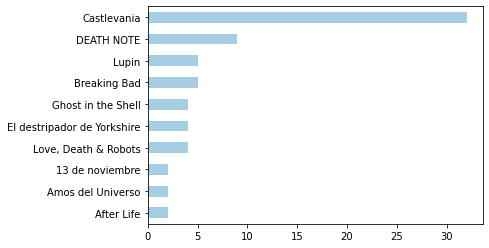

In [33]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Paired');

Echo en falta mi serie favorita! Hijos de la Anarquía. Vamos a hacer una consulta de los títulos que incluyan ese nombre para ver por qué.

¿Qué día de la semana suelo ver más series?

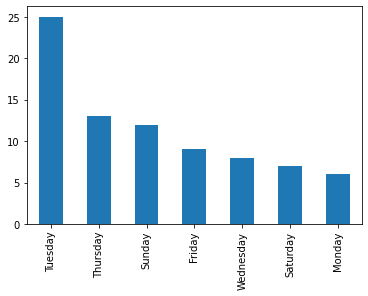

In [34]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

¿Días de la semana en los que veo Netflix series y películas?

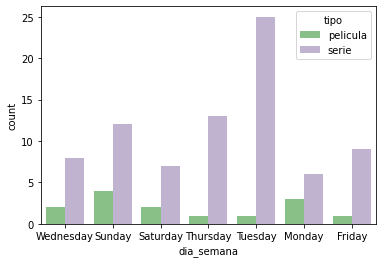

In [37]:
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'Accent');

¿Qué meses consumo (Netflix, no H) más?

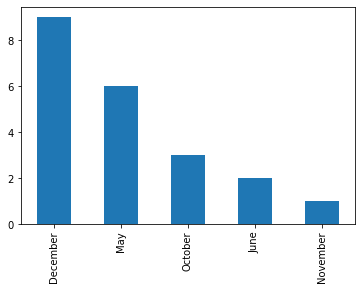

In [39]:
df.loc[df.año < 2021].mes.value_counts().plot.bar();

¿Afectó el confinamiento a la cantidad de uso que hice de Netflix?

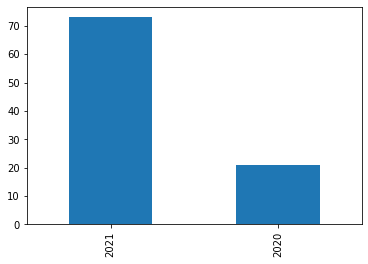

In [40]:
df.año.value_counts().plot.bar();